In [3]:
# IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Try reading the CSV with a different encoding
data = pd.read_csv("C://Users//HP//Desktop//Dissertation//Availability of crops and production.csv", encoding='ISO-8859-1')

C:\Users\HP\AppData\Local\Temp\ipykernel_3320\1733654755.py:2: DtypeWarning: Columns (4,5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C://Users//HP//Desktop//Dissertation//Availability of crops and production.csv", encoding='ISO-8859-1')


In [5]:
# Display the first few rows of the dataset
print(data.head())

  Domain Code                                             Domain  \
0         SUA  Availability (based on supply utilization acco...   
1         SUA  Availability (based on supply utilization acco...   
2         SUA  Availability (based on supply utilization acco...   
3         SUA  Availability (based on supply utilization acco...   
4         SUA  Availability (based on supply utilization acco...   

   Area Code (M49)      Area Food Group Code                  Food Group  \
0               72  Botswana             FG1  Cereals and their products   
1               72  Botswana             FG1  Cereals and their products   
2               72  Botswana             FG1  Cereals and their products   
3               72  Botswana             FG1  Cereals and their products   
4               72  Botswana             FG1  Cereals and their products   

   Indicator Code       Indicator Item Item Code  Year Code  Year  \
0          4004.0  Protein supply  NaN       NaN       2010  2010

In [32]:
# determine the shape of the data
#shows teh number of rows and columns in the dataset
data.shape

(239167, 19)

In [7]:
# shows the information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65897 entries, 0 to 65896
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       65897 non-null  object 
 1   Domain            65897 non-null  object 
 2   Area Code (M49)   65897 non-null  int64  
 3   Area              65897 non-null  object 
 4   Food Group Code   15362 non-null  object 
 5   Food Group        15362 non-null  object 
 6   Indicator Code    15362 non-null  float64
 7   Indicator         15362 non-null  object 
 8   Item              50535 non-null  object 
 9   Item Code         50535 non-null  object 
 10  Year Code         65897 non-null  int64  
 11  Year              65897 non-null  int64  
 12  Element Code      65897 non-null  int64  
 13  Element           65897 non-null  object 
 14  Unit              65897 non-null  object 
 15  Value             65897 non-null  float64
 16  Flag              65897 non-null  object

In [33]:
#add columns to list for easy access
data.columns.tolist()

['Domain Code',
 'Domain',
 'Area Code (M49)',
 'Area',
 'Food Group Code',
 'Food Group',
 'Indicator Code',
 'Indicator',
 'Item Code',
 'Item',
 'Year Code',
 'Year',
 'Element Code',
 'Element',
 'Unit',
 'Value',
 'Flag',
 'Flag Description',
 'Note']

In [35]:
# check for missing values
data.isnull().sum()

Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Food Group Code     190055
Food Group          190055
Indicator Code      190055
Indicator           190055
Item Code            49112
Item                 49112
Year Code                0
Year                     0
Element Code             0
Element                  0
Unit                     0
Value                    0
Flag                     0
Flag Description         0
Note                233520
dtype: int64

<AxesSubplot:>

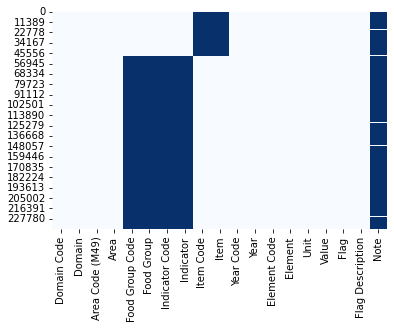

In [36]:
sns.heatmap(data.isnull(), cbar=False, cmap='Blues')

In [37]:
# imputing missing values with empty strings
data["Food Group Code"].fillna('', inplace=True)
data["Food Group"].fillna('',inplace = True)
data["Indicator Code"].fillna('', inplace=True)
data["Indicator"].fillna('', inplace=True)
data["Note"].fillna('', inplace=True)
data["Item"].fillna('', inplace=True)
data["Item Code"].fillna('', inplace=True)

In [38]:
#checking to see if there are still any missing values
data.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Food Group Code     0
Food Group          0
Indicator Code      0
Indicator           0
Item Code           0
Item                0
Year Code           0
Year                0
Element Code        0
Element             0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64

In [39]:
#handling duplicated rows
duplicate_rows_data = data[data.duplicated()]
print("number of duplicated rows: ", duplicate_rows_data.shape)

number of duplicated rows:  (0, 19)


In [48]:
#drop the duplicates
data = data.drop_duplicates()

In [45]:
dropped_columns = ['Domain Code','Area Code (M49)','Year Code','Flag','Flag Description','Note']
dropped = data.drop(columns=dropped_columns)
data = dropped

In [46]:
#returns the new shape of the dataset
data.shape

(239167, 13)

In [49]:
#checks for yhe number of unique values found in each column
data.nunique()

Domain                 2
Area                  16
Food Group Code       16
Food Group            16
Indicator Code        26
Indicator             26
Item Code            216
Item                 216
Year                  62
Element Code          22
Element               10
Unit                  16
Value              67045
dtype: int64

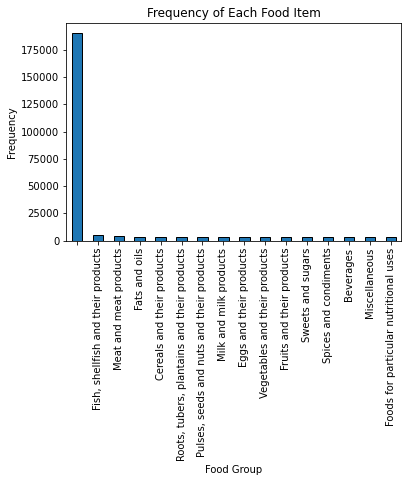

In [50]:
#Bar Chart for Item Frequency
data['Food Group'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Frequency of Each Food Item')
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.show()

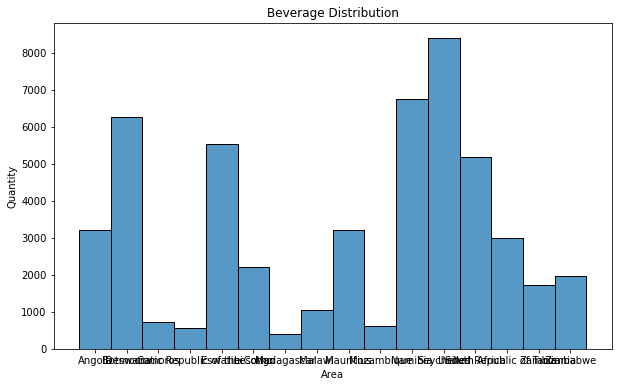

In [51]:
# Ditribution plots for the different food groups
Beverage_data = data[data['Food Group']== 'Beverages']
plt.figure(figsize=(10,6))
sns.histplot(data=Beverage_data, x='Area Code (M49)', weights='Value',discrete=True,binwidth=1)
plt.title("Beverage Distribution")
plt.xlabel('Area')
plt.ylabel('Quantity')
plt.show()

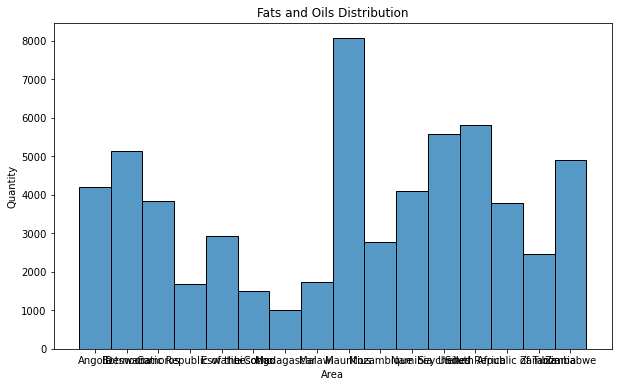

In [52]:
Fats_Oils_Data = data[data['Food Group']== 'Fats and oils']
plt.figure(figsize=(10,6))
sns.histplot(data=Fats_Oils_Data, x='Area', weights='Value',discrete=True,binwidth=1)
plt.title("Fats and Oils Distribution")
plt.xlabel('Area')
plt.ylabel('Quantity')
plt.show()

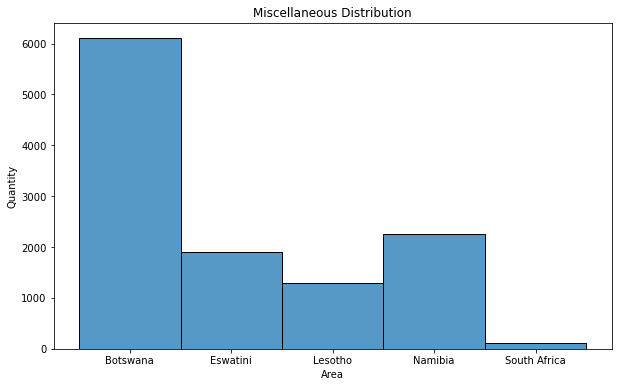

In [30]:
Miscellaneous_data = data[data['Food Group']== 'Miscellaneous']
plt.figure(figsize=(10,6))
sns.histplot(data=Miscellaneous_data, x='Area', weights='Value',discrete=True,binwidth=1)
plt.title("Miscellaneous Distribution")
plt.xlabel('Area')
plt.ylabel('Quantity')
plt.show()

In [ ]:
Beverage_data = data[data['Food Group']== 'Beverages']
plt.figure(figsize=(10,6))
sns.histplot(data=Beverage_data, x='Area', weights='Value',discrete=True,binwidth=1)
plt.title("Beverage Distribution")
plt.xlabel('Area')
plt.ylabel('Quantity')
plt.show()